# Accessing all profiles at once 

Conveniently, all the core mision profiles are compated in a single file, named: `<FloatWmoID>_prof.nc` 

**6901254/6901254_prof.nc**

In [1]:
import numpy as np
import xarray as xr
import netCDF4
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
prof  = xr.open_dataset('./Data/6901254/6901254_prof.nc')

In this case, N_PROF is 66, since there are 66 two for the first cycle, the descending and the ascending. This profiles are just the 'Primary sampling', if you need the high resotuion upper 5dbar you ave to use the indvidual cycle files.

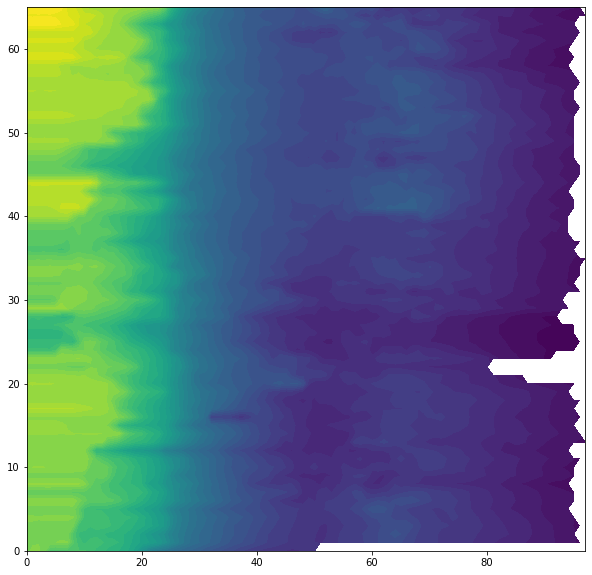

In [3]:
fig , ax = plt.subplots(figsize=(10,10))
ax.contourf(prof.PSAL,40);

However, if we want to add the proper pressure levels, since each profile have slighly different levels

In [4]:
prof.PRES[3,:].values

array([   6.,    7.,    8.,    9.,   10.,   16.,   25.,   36.,   46.,
         55.,   66.,   76.,   86.,   96.,  106.,  115.,  125.,  135.,
        146.,  156.,  165.,  176.,  186.,  196.,  213.,  237.,  262.,
        288.,  313.,  338.,  363.,  388.,  413.,  438.,  463.,  488.,
        513.,  538.,  563.,  588.,  613.,  638.,  663.,  687.,  713.,
        738.,  763.,  788.,  813.,  838.,  863.,  888.,  914.,  938.,
        963.,  988., 1013., 1038., 1063., 1088., 1113., 1139., 1163.,
       1188., 1213., 1238., 1263., 1288., 1313., 1338., 1363., 1388.,
       1413., 1439., 1463., 1488., 1513., 1538., 1563., 1588., 1613.,
       1638., 1663., 1688., 1713., 1738., 1763., 1788., 1813., 1838.,
       1863., 1888., 1913., 1938., 1963., 1988., 2013., 2036.],
      dtype=float32)

In [5]:
prof.PRES[4,:].values

array([   6.,    7.,    8.,    9.,   10.,   16.,   25.,   35.,   45.,
         55.,   66.,   75.,   85.,   95.,  106.,  116.,  125.,  135.,
        145.,  156.,  165.,  175.,  186.,  196.,  213.,  238.,  263.,
        287.,  313.,  338.,  363.,  388.,  413.,  438.,  463.,  488.,
        513.,  538.,  563.,  588.,  613.,  638.,  663.,  689.,  713.,
        738.,  763.,  788.,  813.,  838.,  863.,  889.,  913.,  938.,
        963.,  988., 1013., 1038., 1063., 1089., 1113., 1138., 1163.,
       1188., 1213., 1238., 1263., 1289., 1313., 1338., 1363., 1388.,
       1413., 1438., 1462., 1488., 1513., 1538., 1563., 1588., 1613.,
       1639., 1663., 1688., 1713., 1737., 1763., 1788., 1813., 1837.,
       1863., 1888., 1913., 1938., 1963., 1978.,   nan,   nan],
      dtype=float32)

we will need to do a little of interpolation to use contour:

In [6]:
juld=prof.JULD.values
psal=prof.PSAL.values
pres=prof.PRES.values
prei=np.arange(5,2005,5)

psali= np.zeros((juld.shape[0],prei.shape[0]))
psali.fill(np.nan)

for ip in range(0,pres.shape[0]-1):
    psali[ip,:]=np.interp(prei,pres[ip,:],psal[ip,:])

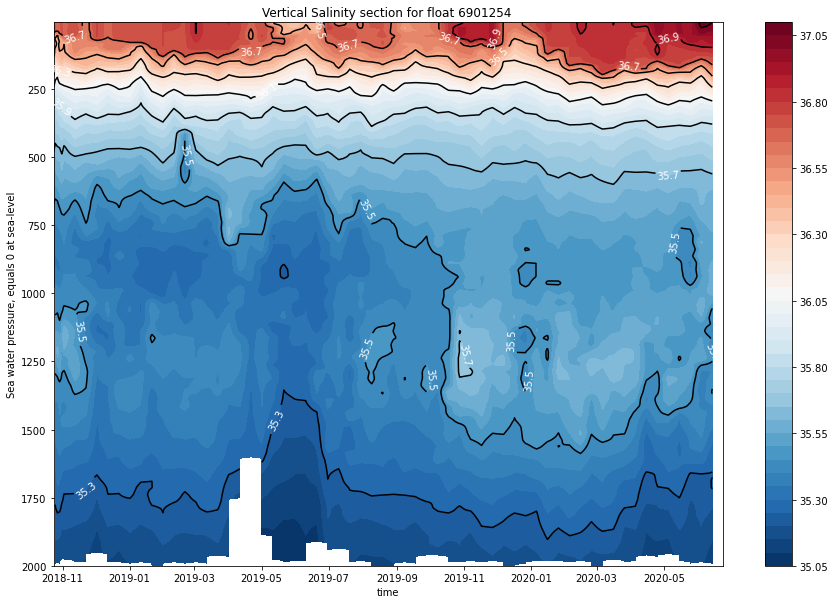

In [7]:
fig, ax = plt.subplots(figsize=(15,10))

cs=ax.contourf(juld,prei,psali.transpose(),40,cmap="RdBu_r")
cs2=ax.contour(juld,prei,psali.transpose(),colors=('k'), levels=cs.levels[::4])

ax.invert_yaxis()
ax.clabel(cs2, fmt='%2.1f', colors='w', fontsize=10)

ax.set_title(f"Vertical Salinity section for float {prof.PLATFORM_NUMBER[0].astype(str).values}")
ax.set_xlabel(f"{prof.JULD.standard_name}")
ax.set_ylabel(f"{prof.PRES.long_name}")

cbar=fig.colorbar(cs,ax=ax)

or a TS diagram using the hydrographic data in `TEMP` and `PSAl`

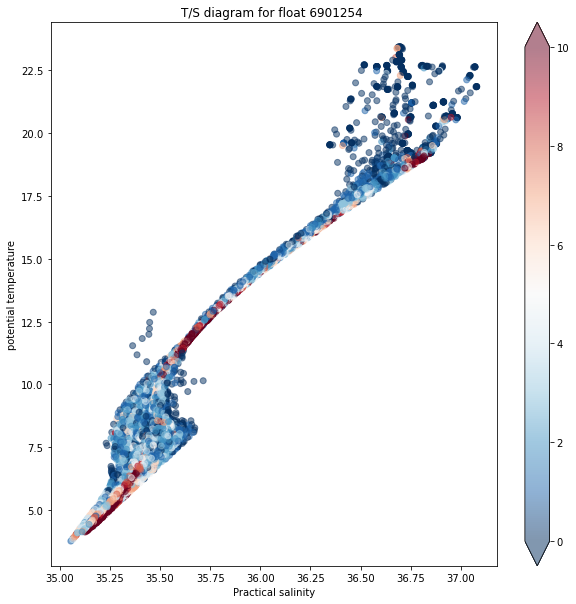

In [8]:
import seawater as sw

temp=prof.TEMP.values.flatten()
psal=prof.PSAL.values.flatten()
pres=prof.PRES.values.flatten()

ptmp=sw.ptmp(psal, temp, pres, pr=0)

t_bins = np.linspace(2, 25, 200)
s_bins = np.linspace(35, 37.25, 200)

hist, xedges, yedges = np.histogram2d(psal, ptmp, (s_bins, t_bins))
xidx = np.clip(np.digitize(psal, xedges), 0, hist.shape[0]-1)
yidx = np.clip(np.digitize(ptmp, yedges), 0, hist.shape[1]-1)
c = hist[xidx, yidx]

fig, ax = plt.subplots(figsize=(10,10))
sc=ax.scatter(psal, ptmp, c=c,alpha=0.5, cmap="RdBu_r",vmin=0, vmax=10)
ax.set_title(f"T/S diagram for float {prof.PLATFORM_NUMBER[0].astype(str).values}")
ax.set_ylabel("potential temperature")
ax.set_xlabel(f"{prof.PSAL.long_name}")
fig.colorbar(sc,extend='both');

## Metadata

all the metadata information for each profile is included:

In [9]:
for i1 in range(1,prof.dims['N_PROF'],10):
    print(f"Cycle {prof.data_vars['CYCLE_NUMBER'].values.astype(int)[i1]}"
          f" Direction {prof.data_vars['DIRECTION'].values.astype(str)[i1]}"
          f" WMO {prof.data_vars['PLATFORM_NUMBER'].values.astype(str)[i1]}"
          f" Data Center {prof.data_vars['DATA_CENTRE'].values.astype(str)[i1]}"   
          f" Project {prof.data_vars['PROJECT_NAME'].values.astype(str)[i1]}" )

Cycle 1 Direction A WMO 6901254  Data Center IF Project ARGO SPAIN                                                      
Cycle 11 Direction A WMO 6901254  Data Center IF Project ARGO SPAIN                                                      
Cycle 21 Direction A WMO 6901254  Data Center IF Project ARGO SPAIN                                                      
Cycle 31 Direction A WMO 6901254  Data Center IF Project ARGO SPAIN                                                      
Cycle 41 Direction A WMO 6901254  Data Center IF Project ARGO SPAIN                                                      
Cycle 51 Direction A WMO 6901254  Data Center IF Project ARGO SPAIN                                                      
Cycle 61 Direction A WMO 6901254  Data Center IF Project ARGO SPAIN                                                      
